In [1]:
#importing Liabraries

import pandas as pd
import numpy as np
#!pip install nltk
#!pip install wordcloud
import nltk
#nltk.download()

In [2]:
#Reading the file
reviews = pd.read_csv("C:/Users/Subhamoy/Desktop/Term2/Unstructured Data/Text Analytics/K8 Reviews v0.2.csv")
reviews.head()

,sentiment,review
0,1,Good but need updates and improvements
1,0,"Worst mobile i have bought ever, Battery is dr..."
2,1,when I will get my 10% cash back.... its alrea...
3,1,Good
4,0,The worst phone everThey have changed the last...


Dataset is scrapped from Amazon for Lenevo k8 mobile phones

Review in the form of free text was scrapped and the user rating

A user rating of 1,2,3 -> sentiment as 0

A user rating of 4 and 5 -> sentiment as 1

In [3]:
reviews.shape

(14675, 2)

Get the word colud:
    1. Combine all the reviews into a single string
    2. Instantiate word cloud
    3. generate the word cloud

In [4]:
#importing WordCloud
from wordcloud import WordCloud

In [5]:
#combining all the reviews in a single string

reviews_combined = " ".join(reviews.review.values)

In [6]:
len(reviews_combined)

1674772

In [7]:
reviews_combined[:200]

'Good but need updates and improvements Worst mobile i have bought ever, Battery is draining like hell, backup is only 6 to 7 hours with internet uses, even if I put mobile idle its getting discharged.'

In [8]:
word_cloud = WordCloud().generate(reviews_combined)

In [9]:
import matplotlib.pyplot as plt

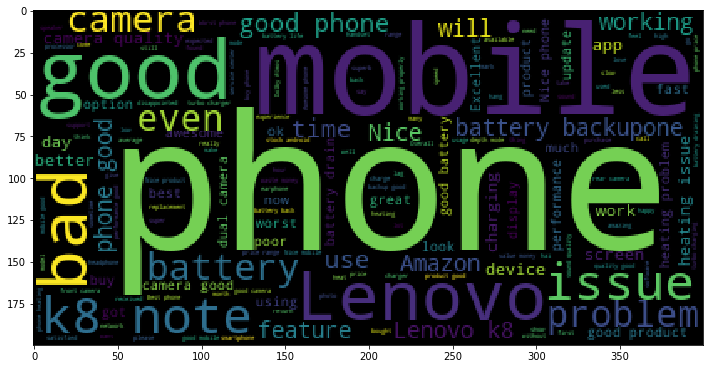

In [10]:
plt.figure(figsize= [12,8])
plt.imshow(word_cloud)
plt.show()

Lets beautify it little more

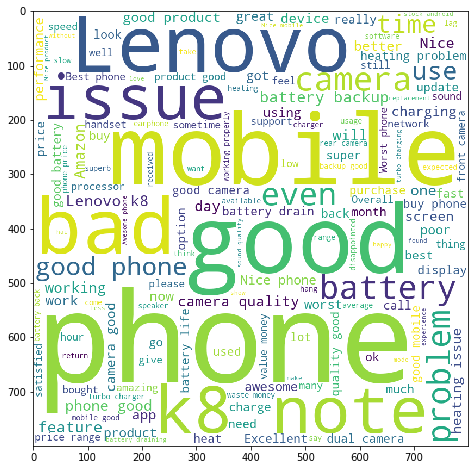

In [11]:
word_cloud = WordCloud(width = 800, height = 800, 
                       background_color ='white',
                       max_words = 150).\
generate(reviews_combined)
plt.figure(figsize= [10, 8])
plt.imshow(word_cloud)
plt.show()

from the wordcloud we can infer that the dataset is related to a phone that is lenevo k8 note
but we already know that so we have to remove those words from the word cloud beacuse we cant infer anything from those words

so the words like heating problem and camera good is taken the back seat beacuse of that

## Bar graph of Top 25 words

1. Get the words and the frequecies
2. sort based on the frequencies and get the top 25 words
3. plot the bar graph

In [12]:
lt=[]
for i in reviews.review:
    lt.extend(i.split())

In [13]:
dic= {}
for i in lt:
    dic[i] = dic.get(i, 0)+1

In [14]:
df = pd.DataFrame()
df['words'] = dic.keys()
df['frequency'] = dic.values()

In [15]:
top_25 = df.sort_values('frequency', ascending = False).head(25)
top_25.head(2)

,words,frequency
13,is,10151
94,the,5565


<BarContainer object of 25 artists>

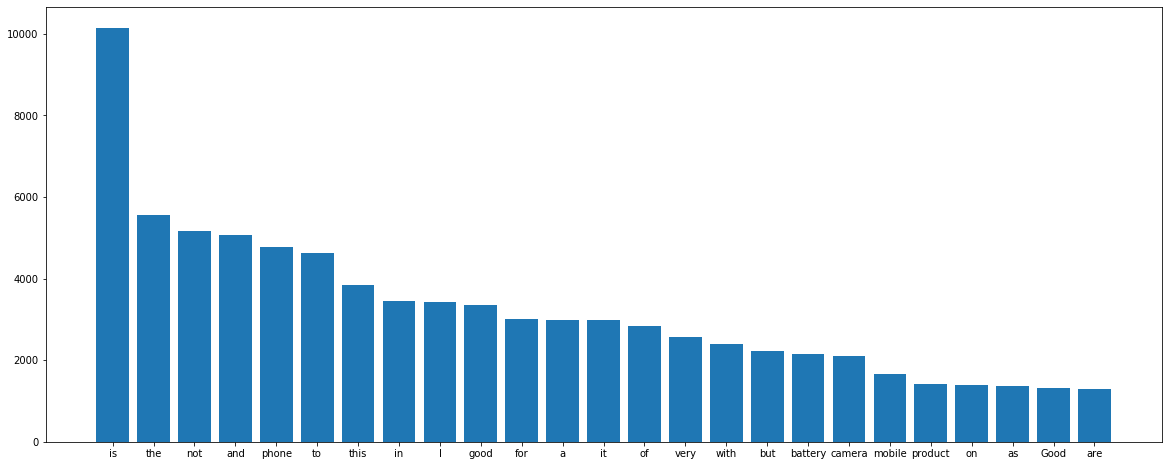

In [16]:
plt.figure(figsize= [20,8])
plt.bar(top_25.words,top_25.frequency)

### Problems with these visuals:
    1. Too many distinct words in the corpus of reviews
    2. Punctuations non uniform case
    3. there are language connectors in the text - Stop words
    4. Words with different forms/tenses - charge, charged, charging
    

### Text processing:
    1. Text cleaning.
    2. get the visuals- word cloud and bar graph or frequency graph
    3. converting text to numeric matrices
    4. Advanced visuals using collocations(n-grams- unigrams, bigrams, trigrams)
    5. Sentiment analysis and Sentiment classification
    6. Text classification
    7. Document clustering

In [17]:
#importing word_tokenize

from nltk.tokenize import word_tokenize

In [18]:
all_terms = word_tokenize(reviews_combined.lower())

In [19]:
print(all_terms[:20])

['good', 'but', 'need', 'updates', 'and', 'improvements', 'worst', 'mobile', 'i', 'have', 'bought', 'ever', ',', 'battery', 'is', 'draining', 'like', 'hell', ',', 'backup']


In [20]:
len(reviews_combined) , len(all_terms)

(1674772, 324233)

here the number of words are reduced beacuse all the upper and lower case words are now in lower case only so now they are not distinct

In [21]:
from nltk.probability import FreqDist

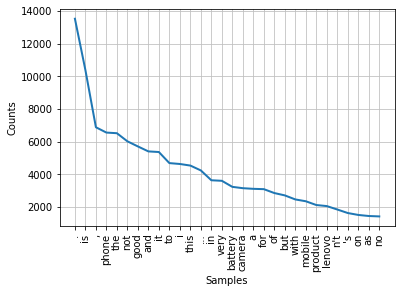

In [22]:
fdist = FreqDist(all_terms)
fdist.plot(30, cumulative = False)
plt.show()

The head and the tail of the above graph consists of either punkt or stop words which needs to be removed

In [23]:
from string import punctuation
from nltk.corpus import stopwords

In [24]:
stop_nltk  = stopwords.words("english")

In [25]:
stop_updated = stop_nltk + ["...", ".."]+ ["mobile", "phone", "lenovo", "k8", "n't", "note"]

In [26]:
reviews_updated1 = [term for term in all_terms \
             if term not in list(punctuation) and (term not in stop_updated) and len(term)>2]

In [27]:
len(set(reviews_updated1))

18475

In [28]:
len(reviews_updated1)

158184

### Stemming

In [29]:
from nltk.stem import SnowballStemmer

In [30]:
stemmer_s = SnowballStemmer("english")

In [31]:
val=([stemmer_s.stem(word) for word in reviews_updated1])

In [32]:
len(set(val))

16161

Stemmer reduce the number of distinct words in the corpus to a greater exten

lets build a udf

- input: review
- Tasks: All the above cleaning steps
- Return: Cleaned review
    
based on the outcome of this function, you should be able to add a new column in the data frame called as "cleaned_review"

In [33]:
def clean_text(sent):
    tokens = word_tokenize(sent.lower())
    stemmed = [stemmer_s.stem(term) for term in tokens\
              if term not in stop_updated and \
              term not in list(punctuation) and \
              len(term) >2]
    res = " ".join(stemmed)
    return res

In [34]:
reviews['clean_review'] = reviews.review.apply(clean_text)

In [35]:
reviews.head(2)

,sentiment,review,clean_review
0,1,Good but need updates and improvements,good need updat improv
1,0,"Worst mobile i have bought ever, Battery is dr...",worst bought ever batteri drain like hell back...


In [36]:
reviews_combined = " ".join(reviews.clean_review.values)

In [37]:
word_cloud = WordCloud().generate(reviews_combined)

In [38]:
word_cloud = WordCloud(width = 800, height = 800, 
                       background_color ='white',
                       max_words = 150).\
generate(reviews_combined)

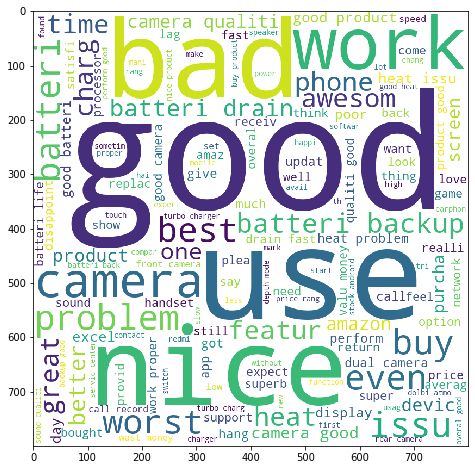

In [39]:
plt.figure(figsize= [12, 8])
plt.imshow(word_cloud)
plt.show()

In [40]:
reviews.head()

,sentiment,review,clean_review
0,1,Good but need updates and improvements,good need updat improv
1,0,"Worst mobile i have bought ever, Battery is dr...",worst bought ever batteri drain like hell back...
2,1,when I will get my 10% cash back.... its alrea...,get cash back alreadi january..
3,1,Good,good
4,0,The worst phone everThey have changed the last...,worst everthey chang last problem still amazon...


In [41]:
dic={}
for i in reviews.review:
    for j in i.split():
        if j in stop_nltk:
            dic[j] = dic.get(j, 0)+1

## Creating Bar graph for the top 25 frequrntly used bigrams

In [42]:
from sklearn.feature_extraction.text import CountVectorizer
count_nfeatures = CountVectorizer(max_features = 25, ngram_range=(2,2))#creating an instance of CountVectorizer class

In [43]:
x_nfeatures = count_nfeatures.fit_transform(reviews.clean_review)
DTM_nfeatures = pd.DataFrame(x_nfeatures.toarray(), columns = count_nfeatures.get_feature_names())
sorted_column = DTM_nfeatures.sum().sort_values(ascending = False)
sorted_column

batteri backup    593
batteri drain     490
camera qualiti    473
heat issu         397
good product      378
camera good       374
heat problem      340
dual camera       298
good batteri      287
drain fast        278
batteri life      272
good camera       248
work proper       234
get heat          224
qualiti good      217
valu money        210
wast money        190
front camera      189
call record       183
price rang        182
turbo charger     182
turbo charg       176
batteri back      176
rear camera       168
also good         164
dtype: int64

In [44]:
df = pd.DataFrame(sorted_column).reset_index()
df.columns = ['words', 'frequency']
df.head()

,words,frequency
0,batteri backup,593
1,batteri drain,490
2,camera qualiti,473
3,heat issu,397
4,good product,378


<BarContainer object of 25 artists>

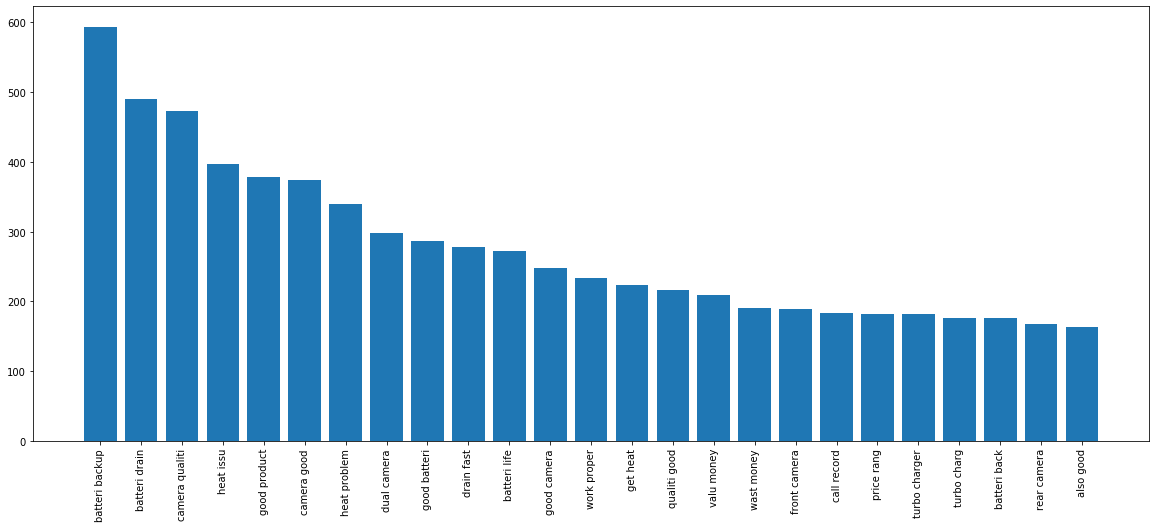

In [45]:
plt.figure(figsize= [20,8])
plt.xticks(rotation=90)
plt.bar(df.words, df.frequency)


In [46]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [47]:
tfidf_vect = TfidfVectorizer(ngram_range=(2,2))
x = tfidf_vect.fit_transform(reviews.clean_review)

In [48]:
tfidf = pd.DataFrame(x.toarray(), columns = tfidf_vect.get_feature_names())

In [49]:
tfidf[['batteri backup', 'camera good']].sort_values(by = ['batteri backup', 'camera good'], ascending= False).head(5)

,batteri backup,camera good
5632,1.000000,0.0
9080,1.000000,0.0
14009,1.000000,0.0
7409,0.652497,0.0
124,0.598175,0.0


In [50]:
tfidf['batteri drain'].sort_values(ascending = False).head()

6404    0.665165
6486    0.665165
3130    0.665165
2964    0.665165
112     0.665165
Name: batteri drain, dtype: float64

In [51]:
tfidf['good camera'].sort_values(ascending = False).head()

13420    1.000000
1439     0.753303
3127     0.753303
10756    0.735349
10047    0.735349
Name: good camera, dtype: float64

## Sentiment Analysis

In [53]:
affin = pd.read_csv("C:/Users/Subhamoy/Desktop/Term2/Unstructured Data/Text Analytics/AFINN-111.txt", sep= "\t", header= None)
affin.head()

,0,1
0,abandon,-2
1,abandoned,-2
2,abandons,-2
3,abducted,-2
4,abduction,-2


In [54]:
affin.columns= ["Term", "Score"]
term_scores = dict(affin.values)

In [55]:
## UDF

def get_sentiment(sent):
    tokens = word_tokenize(sent.lower())
    score = 0
    for word in tokens:
        score += term_scores.get(word, 0)
    return score

In [56]:
reviews['sent_score'] = reviews.clean_review.apply(get_sentiment)

In [57]:
reviews.head()

,sentiment,review,clean_review,sent_score
0,1,Good but need updates and improvements,good need updat improv,3
1,0,"Worst mobile i have bought ever, Battery is dr...",worst bought ever batteri drain like hell back...,-8
2,1,when I will get my 10% cash back.... its alrea...,get cash back alreadi january..,0
3,1,Good,good,3
4,0,The worst phone everThey have changed the last...,worst everthey chang last problem still amazon...,-7


In [58]:
reviews["sent_prediction"] = reviews.sent_score.apply(lambda x:1 if x>0 else 0)

In [59]:
reviews.head()

,sentiment,review,clean_review,sent_score,sent_prediction
0,1,Good but need updates and improvements,good need updat improv,3,1
1,0,"Worst mobile i have bought ever, Battery is dr...",worst bought ever batteri drain like hell back...,-8,0
2,1,when I will get my 10% cash back.... its alrea...,get cash back alreadi january..,0,0
3,1,Good,good,3,1
4,0,The worst phone everThey have changed the last...,worst everthey chang last problem still amazon...,-7,0


In [60]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [61]:
accuracy_score(reviews.sentiment, reviews.sent_prediction)

0.7118228279386712

## Using vader getting the compound score

In [62]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [63]:
analyser = SentimentIntensityAnalyzer()

In [64]:
def get_vadar_sentiment(sent):
    return analyser.polarity_scores(sent)['compound']

In [65]:
reviews['compund_score'] = reviews.review.apply(get_vadar_sentiment)

In [66]:
reviews["sent_prediction_vader"] = reviews.compund_score.apply(lambda x:1 if x>0.3 else 0)

In [67]:
reviews.head()

,sentiment,review,clean_review,sent_score,sent_prediction,compund_score,sent_prediction_vader
0,1,Good but need updates and improvements,good need updat improv,3,1,0.5994,1
1,0,"Worst mobile i have bought ever, Battery is dr...",worst bought ever batteri drain like hell back...,-8,0,-0.8720,0
2,1,when I will get my 10% cash back.... its alrea...,get cash back alreadi january..,0,0,0.0000,0
3,1,Good,good,3,1,0.4404,1
4,0,The worst phone everThey have changed the last...,worst everthey chang last problem still amazon...,-7,0,-0.8289,0


In [68]:
accuracy_score(reviews.sentiment, reviews.sent_prediction_vader)

0.7990459965928449

## Sentiment Prediction Strategy 3: Building our own model

step-1 : get the x and y

step-2 : Split into test and train

step-3 : Converting text to numbers (countvectorizer or tfidfvectorizer)

step-4 : train

step-5 : test and get the accuracy scores

In [69]:
x = reviews.clean_review.values
y = reviews.sentiment.values

In [70]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state= 0)

In [71]:
count_vect = CountVectorizer()

In [72]:
#Extract the features on the reviews for train - fit
#compute the count of every word extracted in every document(review)

x_train_bow = count_vect.fit_transform(x_train)


In [73]:
#For all the features extracted, compute the count in the test data set of reviews

x_test_bow = count_vect.transform(x_test)

In [74]:
x_train_bow.shape

(10272, 8540)

In [75]:
x_test_bow.shape

(4403, 8540)

In [76]:
from sklearn.linear_model import LogisticRegression

In [77]:
lr = LogisticRegression()
lr.fit(x_train_bow, y_train)
y_pred = lr.predict(x_test_bow)

C:\Users\Subhamoy\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [78]:
accuracy_score(y_pred, y_test)

0.8544174426527368

In [79]:
## Clustering

In [80]:
tfidf_vect = TfidfVectorizer(max_features=3000)
x = tfidf_vect.fit_transform(reviews.clean_review)

In [81]:
tfidf = pd.DataFrame(x.toarray(), columns = tfidf_vect.get_feature_names())

In [82]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters= 6 , random_state= 0)
y_kmeans = kmeans.fit_predict(tfidf)

In [83]:
val=[]
for i in kmeans.cluster_centers_:
    val.append((np.argsort(i)[-1])+1)
c=1
t=0
terms = tfidf_vect.get_feature_names()
for i in val:
    print(str(c)+" cluster is taking about the term-",terms[t])
    t+=1
    c+=1

1 cluster is taking about the term- 00
2 cluster is taking about the term- 000
3 cluster is taking about the term- 01
4 cluster is taking about the term- 05
5 cluster is taking about the term- 08
6 cluster is taking about the term- 09


In [84]:
## Top N terms

In [85]:
n = int(input("Enter the number of term you wanna check cluster wise"))
print("Top "+ str(n)+ " term per cluster:")
num_cluster= 6 
bow = tfidf_vect.get_feature_names()
#Get the index of the cluster centers in reverse order for every cluster
#step-1

order_centroid_arg = kmeans.cluster_centers_.argsort()[:, ::-1]

#step-2

for i in range(num_cluster):
    print("Cluster: ", i)
    for ind in order_centroid_arg[i, :n]:
        #to get the dominating term per cluster
        print(bow[ind])

Enter the number of term you wanna check cluster wise5
Top 5 term per cluster:
Cluster:  0
good
product
batteri
camera
price
Cluster:  1
good
camera
qualiti
batteri
perform
Cluster:  2
nice
product
good
one
camera
Cluster:  3
heat
batteri
problem
charg
issu
Cluster:  4
best
price
rang
good
product
Cluster:  5
product
work
bad
awesom
camera


In [86]:
reviews['cluster_predicted'] = y_kmeans
reviews.head()

,sentiment,review,clean_review,sent_score,sent_prediction,compund_score,sent_prediction_vader,cluster_predicted
0,1,Good but need updates and improvements,good need updat improv,3,1,0.5994,1,1
1,0,"Worst mobile i have bought ever, Battery is dr...",worst bought ever batteri drain like hell back...,-8,0,-0.8720,0,3
2,1,when I will get my 10% cash back.... its alrea...,get cash back alreadi january..,0,0,0.0000,0,5
3,1,Good,good,3,1,0.4404,1,0
4,0,The worst phone everThey have changed the last...,worst everthey chang last problem still amazon...,-7,0,-0.8289,0,5


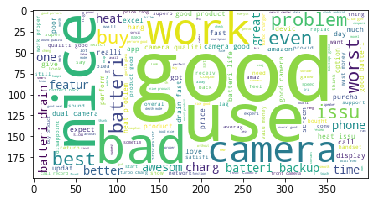

In [87]:
group = reviews[reviews['cluster_predicted'] == 1]
text = ' '.join(reviews['clean_review'])
wc = WordCloud(background_color='white').generate(text)
plt.imshow(wc)

## <center>  END  </center>